In [1]:
import numpy as np
import pandas as pd

estimates = pd.read_pickle("../output/estimates_sim_records_precision.pickle")
ground_truth = pd.read_csv("../output/ground_truth.tsv", sep="\t")

In [2]:
ground_truth.rename(columns={"Unnamed: 0":"rate"}, inplace=True)

In [3]:
ground_truth

,rate,precision,recall
0,5,0.900896,0.902363
1,10,0.805255,0.809002
2,20,0.634220,0.639422


In [4]:
estimates["mean_ests"] = estimates.apply(lambda x: np.mean(x.estimates, where=~np.isnan(x.estimates)), axis=1)
estimates["rate"] = estimates["rate"].astype(int)
estimates["gt_precision"] = estimates.apply(lambda x: ground_truth.set_index("rate").precision[x.rate], axis=1)
estimates["bias"] = estimates.apply(lambda x: x.mean_ests - x.gt_precision, axis=1)
estimates["rmse"] = estimates.apply(lambda x: np.sqrt(np.mean((np.array(x.estimates) - x.gt_precision)**2)), axis=1)

In [5]:
estimates

,sample_size,rate,estimator,estimates,mean_ests,gt_precision,bias,rmse
0,100,20,P_naive,"[1.0, 1.0, 1.0, 0.9999983278766374, 1.0, 1.0, ...",0.999877,0.634220,0.365657,0.365658
1,100,20,P_single_block,"[0.745287263207828, 0.7423471415119558, 0.7600...",0.756496,0.634220,0.122276,0.124865
2,100,20,P_record,"[0.5192041719971389, 0.5616623386953957, 0.583...",0.633412,0.634220,-0.000807,0.206570
3,100,20,P_cluster_block,"[0.619723086869056, 0.640730449585622, 0.63369...",0.629915,0.634220,-0.004304,0.063149
4,100,5,P_naive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.999986,0.900896,0.099090,0.099091
5,100,5,P_single_block,"[0.9431584861928899, 0.9255663986192625, 0.946...",0.938494,0.900896,0.037598,0.039107
6,100,5,P_record,"[0.7562744237369128, 0.7916157811188721, 0.834...",0.899113,0.900896,-0.001783,0.293814
7,100,5,P_cluster_block,"[0.830557569466366, 0.7824293419618372, 0.9301...",0.896538,0.900896,-0.004358,0.045273
8,100,10,P_naive,"[1.0, 1.0, 0.9996359839097534, 1.0, 0.99868827...",0.999954,0.805255,0.194698,0.194698
9,100,10,P_single_block,"[0.8775235630040727, 0.8517584581915693, 0.868...",0.877231,0.805255,0.071975,0.073381


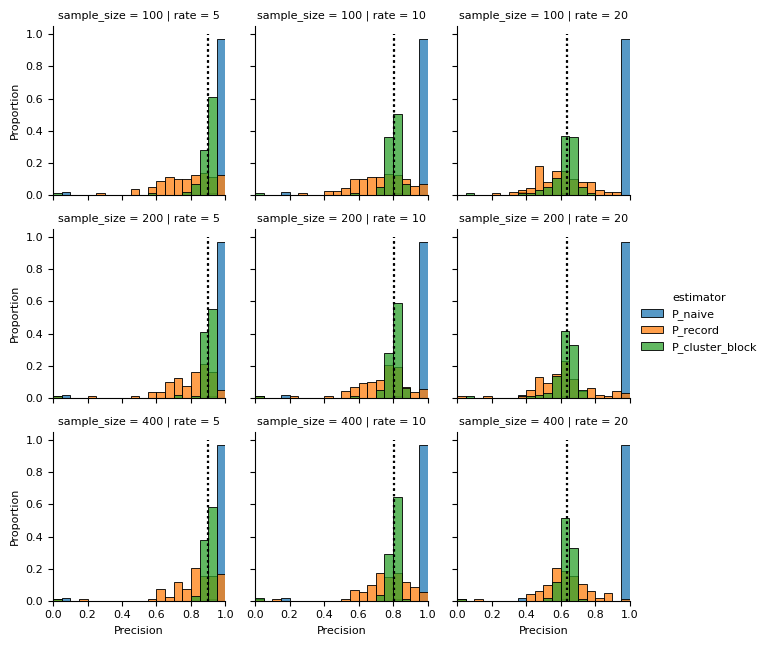

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=8) 
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

dat = estimates.query('estimator != "P_single_block"')
dat = (
    dat
    .estimates
    .apply(pd.Series)
    .merge(dat, right_index=True, left_index=True)
    .melt(id_vars=['sample_size', 'rate', 'estimator', 'estimates'], value_name="estimate")
    .rename(columns={"estimate":"Precision"})
)

g = sns.FacetGrid(dat, hue="estimator", col="rate", row="sample_size", sharey=True, height=6.5/3)
g.set(xlim=(0,1))
g.map(sns.histplot, "Precision", kde=False, common_norm=True, stat="proportion", bins=20, binrange=(0,1), multiple="layer")
g.add_legend()

gt_precision = ground_truth.set_index("rate")["precision"]
for x in g.facet_data():
    ax = g.facet_axis(x[0][0], x[0][1])
    rate = x[1].rate.values[0]
    plt.vlines(x=gt_precision[rate], ymin=0, ymax=1, color="black", linestyles="dotted")

plt.savefig("../output/sim_records_precision.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
estimates.head()

,sample_size,rate,estimator,estimates,mean_ests,gt_precision,bias,rmse
0,100,20,P_naive,"[1.0, 1.0, 1.0, 0.9999983278766374, 1.0, 1.0, ...",0.999877,0.634220,0.365657,0.365658
1,100,20,P_single_block,"[0.745287263207828, 0.7423471415119558, 0.7600...",0.756496,0.634220,0.122276,0.124865
2,100,20,P_record,"[0.5192041719971389, 0.5616623386953957, 0.583...",0.633412,0.634220,-0.000807,0.206570
3,100,20,P_cluster_block,"[0.619723086869056, 0.640730449585622, 0.63369...",0.629915,0.634220,-0.004304,0.063149
4,100,5,P_naive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.999986,0.900896,0.099090,0.099091


In [168]:
table = estimates[["rate", "sample_size", "mean_ests", "gt_precision", "bias", "rmse", "estimator"]]
table = table.sort_values(["rate", "sample_size", "estimator"])
table = table.pivot(index=["rate", "sample_size"], columns="estimator", values=["bias", "rmse"]).T

table.round(3).style.format(precision=3, escape="latex").to_latex(buf="../output/table.tex", multirow_align="c", multicol_align="c", hrules=True)